In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import make_scorer, accuracy_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import roc_curve, auc
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix, accuracy_score

In [2]:
test = pd.read_csv("test.csv")
train = pd.read_csv("train.csv")

In [3]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [4]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [5]:
test.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [9]:
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [10]:
train[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


/Users/Rebecca/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


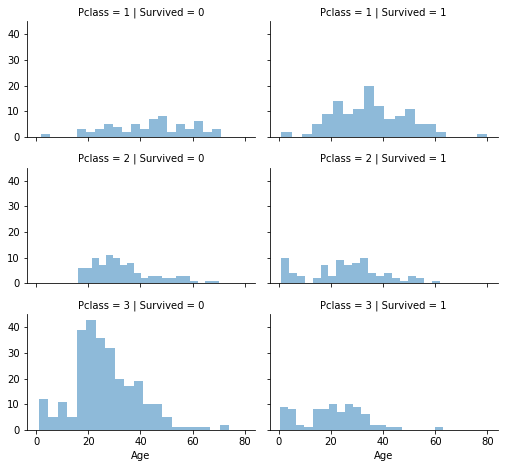

In [11]:
grid = sns.FacetGrid(train, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

Deal with train dataset

In [12]:
missing_total = train.isnull().sum().sort_values(ascending=False)
missing_total

Cabin          687
Age            177
Embarked         2
Fare             0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

In [13]:
train.drop("Cabin", inplace=True, axis=1)

In [14]:
train['Age'] = train.groupby(['Pclass', 'Sex'])['Age'].apply(lambda x: x.fillna(x.mean()))
train.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
5,6,0,3,"Moran, Mr. James",male,26.507589,0,0,330877,8.4583,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,C


In [15]:
train.drop("Name", inplace=True, axis=1)

In [16]:
train.drop("Ticket", inplace=True, axis=1)

In [17]:
train["Sex"] = train["Sex"].map({'male':1, 'female':0})

In [18]:
embarked = pd.get_dummies(train["Embarked"], drop_first=True)

In [19]:
train = pd.concat([train, embarked], axis=1)

In [20]:
train.drop("Embarked", inplace=True, axis=1)

In [21]:
train.head(20)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
0,1,0,3,1,22.000000,1,0,7.2500,0,1
1,2,1,1,0,38.000000,1,0,71.2833,0,0
2,3,1,3,0,26.000000,0,0,7.9250,0,1
3,4,1,1,0,35.000000,1,0,53.1000,0,1
4,5,0,3,1,35.000000,0,0,8.0500,0,1
5,6,0,3,1,26.507589,0,0,8.4583,1,0
6,7,0,1,1,54.000000,0,0,51.8625,0,1
7,8,0,3,1,2.000000,3,1,21.0750,0,1
8,9,1,3,0,27.000000,0,2,11.1333,0,1
9,10,1,2,0,14.000000,1,0,30.0708,0,0


Deal with test dataset

In [22]:
test.isnull().sum().sort_values(ascending=False)

Cabin          327
Age             86
Fare             1
Embarked         0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
PassengerId      0
dtype: int64

In [23]:
test['Age'] = test.groupby(['Pclass', 'Sex'])['Age'].apply(lambda x: x.fillna(x.mean()))
test.drop("Cabin", inplace=True, axis=1)
test.drop("Name", inplace=True, axis=1)
test.drop("Ticket", inplace=True, axis=1)
test["Sex"] = test["Sex"].map({'male':1, 'female':0})
test['Fare'].fillna(test['Fare'].mean(), inplace=True)

In [24]:
embarked_test = pd.get_dummies(test["Embarked"], drop_first=True)
test = pd.concat([test, embarked_test], axis=1)
test.drop("Embarked", inplace=True, axis=1)

test.head(10)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
0,892,3,1,34.5,0,0,7.8292,1,0
1,893,3,0,47.0,1,0,7.0000,0,1
2,894,2,1,62.0,0,0,9.6875,1,0
3,895,3,1,27.0,0,0,8.6625,0,1
4,896,3,0,22.0,1,1,12.2875,0,1
5,897,3,1,14.0,0,0,9.2250,0,1
6,898,3,0,30.0,0,0,7.6292,1,0
7,899,2,1,26.0,1,1,29.0000,0,1
8,900,3,0,18.0,0,0,7.2292,0,0
9,901,3,1,21.0,2,0,24.1500,0,1


Random Forest Model

In [25]:
X_train = train.drop("Survived", axis=1)
Y_train = train["Survived"]

In [26]:
param_grid = {'n_estimators': [20, 100, 200], 
              'max_features': ['log2', 'sqrt','auto'], 
              'criterion': ['entropy', 'gini'],   
              'max_depth': [2, 3, 5, 10], 
              'min_samples_split': [2, 3, 5],
              'min_samples_leaf': [1,5,8]
             }

#acc_scorer = make_scorer(accuracy_score)

#grid_obj = GridSearchCV(clf, parameters, scoring=acc_scorer)
#grid_obj = grid_obj.fit(X_train, Y_train)

#clf = grid_obj.best_estimator_

In [27]:
# make item combination for param_grid dict
import itertools as it
s = sorted(param_grid)
print(s)
combination = it.product(*(param_grid[Name] for Name in s))

['criterion', 'max_depth', 'max_features', 'min_samples_leaf', 'min_samples_split', 'n_estimators']


In [28]:
a = list(combination)
print(a)

[('entropy', 2, 'log2', 1, 2, 20), ('entropy', 2, 'log2', 1, 2, 100), ('entropy', 2, 'log2', 1, 2, 200), ('entropy', 2, 'log2', 1, 3, 20), ('entropy', 2, 'log2', 1, 3, 100), ('entropy', 2, 'log2', 1, 3, 200), ('entropy', 2, 'log2', 1, 5, 20), ('entropy', 2, 'log2', 1, 5, 100), ('entropy', 2, 'log2', 1, 5, 200), ('entropy', 2, 'log2', 5, 2, 20), ('entropy', 2, 'log2', 5, 2, 100), ('entropy', 2, 'log2', 5, 2, 200), ('entropy', 2, 'log2', 5, 3, 20), ('entropy', 2, 'log2', 5, 3, 100), ('entropy', 2, 'log2', 5, 3, 200), ('entropy', 2, 'log2', 5, 5, 20), ('entropy', 2, 'log2', 5, 5, 100), ('entropy', 2, 'log2', 5, 5, 200), ('entropy', 2, 'log2', 8, 2, 20), ('entropy', 2, 'log2', 8, 2, 100), ('entropy', 2, 'log2', 8, 2, 200), ('entropy', 2, 'log2', 8, 3, 20), ('entropy', 2, 'log2', 8, 3, 100), ('entropy', 2, 'log2', 8, 3, 200), ('entropy', 2, 'log2', 8, 5, 20), ('entropy', 2, 'log2', 8, 5, 100), ('entropy', 2, 'log2', 8, 5, 200), ('entropy', 2, 'sqrt', 1, 2, 20), ('entropy', 2, 'sqrt', 1, 2, 

In [29]:
# k-fold with index pair return
def kfold_index(X_train, k):
    if k < 1:
        print('K cannot be smaller than 1')
        return
    else:
        l = X_train.shape[0]
        tail = l % k
        q = l // k
        index = [0]
        output_index = []
        
        for i in range(1, tail):
            index.append(i*q+1)
        for j in range(tail, k+1):
            index.append(j*q+tail)
        for m in range(len(index)-1):
            output_index.append([index[m], index[m+1]])
        
        return output_index

In [30]:
def cv(model, X_train, Y_train, k):
    index = kfold_index(X_train, k)
    
    # train each sub-combination
    auc = []
    for i in range(k):
        
        cv_xtest = X_train.iloc[index[i][0]:index[i][1],:]
        cv_ytest = Y_train.iloc[index[i][0]:index[i][1],]
        
        # drop the test sub-set
        cv_xtrain = X_train.drop(X_train.index[index[i][0]:index[i][1]])
        cv_ytrain = Y_train.drop(X_train.index[index[i][0]:index[i][1]])
        
        model.fit(cv_xtrain, cv_ytrain.values.reshape(-1))
        
        # calculate the auc as the evaluation metric
        fpr, tpr, threshold = roc_curve(cv_ytest, model.predict_proba(cv_xtest)[:,1])
        aa = metrics.auc(fpr, tpr)
        auc.append(aa)
    
    return np.mean(auc)

In [35]:
for i in a:
    rf_clf = RandomForestClassifier(n_estimators = i[5], 
                                    max_features = i[2], 
                                    criterion = i[0],   
                                    max_depth = i[1],
                                    min_samples_split = i[4],
                                    min_samples_leaf = i[3])
    scc = cv(rf_clf, X_train, Y_train, 5)
    score = 0
    
    if scc >= score:
        score = scc
        opt = i

print(score, opt)

0.8631824183734114 ('gini', 10, 'auto', 8, 5, 200)


In [39]:
clf = RandomForestClassifier(criterion='gini', max_depth=10, max_features='auto', min_samples_leaf=8, min_samples_split=5, n_estimators=200)
clf.fit(X_train, Y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=8, min_samples_split=5,
                       n_estimators=200)

In [44]:
test_preds = clf.predict(test)

In [45]:
importances = pd.DataFrame({'feature':X_train.columns,
                            'importance':np.round(clf.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances

,importance
feature,
Sex,0.440
Fare,0.155
Pclass,0.134
Age,0.107
PassengerId,0.079
SibSp,0.036
Parch,0.024
S,0.020
Q,0.006


In [46]:
test_survived = pd.DataFrame({'Survived' : test_preds})
test_survived

,Survived
0,0
1,0
2,0
3,0
4,0
...,...
413,0
414,1
415,0
416,0


In [47]:
test_survived['PassengerId'] = test['PassengerId']
submission = test_survived[['PassengerId','Survived']]
submission.to_csv("submission.csv", index=False)
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
